In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [47]:
DATASET_PATH = '/content/training_data.csv'

In [48]:
df = pd.read_csv(DATASET_PATH)

In [49]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,class,workclass_0,workclass_1,workclass_2,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.030670,-1.063594,1.134721,0.148451,-0.216656,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837096,-1.008692,1.134721,-0.145918,-0.216656,-2.222119,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042641,0.245075,-0.420053,-0.145918,-0.216656,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.057031,0.425795,-1.197440,-0.145918,-0.216656,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.775756,1.408154,1.134721,-0.145918,-0.216656,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
Y = df['class']
X = df.drop(['class'], axis=1)

In [51]:
X.shape

(32561, 108)

In [66]:
model = keras.models.Sequential([
  layers.Input(shape=(108,), name='input_layer'),
  layers.Dense(256, activation='relu', name='fc_1'),
  layers.Dropout(.2, name='dropout_1'),
  layers.Dense(256, activation='relu', name='fc_2'),
  layers.Dropout(.2, name='dropout_2'),
  layers.Dense(1, activation='sigmoid', name='output_layer')
], name='dense_model')

In [67]:
model.summary()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc_1 (Dense)                (None, 256)               27904     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 fc_2 (Dense)                (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 1)                 257       
                                                                 
Total params: 93,953
Trainable params: 93,953
Non-trainable params: 0
_________________________________________________________________


In [68]:
model(np.zeros((10, 108)))

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)>

In [69]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy',
                       keras.metrics.Recall(name='recall'),
                       keras.metrics.Precision(name='precision')])

In [70]:
checkpoint_path = './model/'
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
             keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                             monitor='val_loss',
                                             mode='min')]

history = model.fit(X, Y, epochs=500, batch_size=128, validation_split=.2, callbacks=callbacks)

Epoch 1/500
204/204 [==============================] - 3s 13ms/step - loss: 0.3396 - accuracy: 0.8420 - recall: 0.5600 - precision: 0.7184 - val_loss: 0.3081 - val_accuracy: 0.8537 - val_recall: 0.6431 - val_precision: 0.7293
Epoch 2/500
204/204 [==============================] - 2s 10ms/step - loss: 0.3101 - accuracy: 0.8578 - recall: 0.6252 - precision: 0.7408 - val_loss: 0.3060 - val_accuracy: 0.8561 - val_recall: 0.6294 - val_precision: 0.7454
Epoch 3/500
204/204 [==============================] - 3s 13ms/step - loss: 0.3043 - accuracy: 0.8596 - recall: 0.6368 - precision: 0.7409 - val_loss: 0.3093 - val_accuracy: 0.8540 - val_recall: 0.5675 - val_precision: 0.7781
Epoch 4/500
204/204 [==============================] - 2s 9ms/step - loss: 0.3020 - accuracy: 0.8604 - recall: 0.6311 - precision: 0.7469 - val_loss: 0.3096 - val_accuracy: 0.8552 - val_recall: 0.5969 - val_precision: 0.7622
Epoch 5/500
204/204 [==============================] - 2s 10ms/step - loss: 0.2988 - accuracy: 0.

In [71]:
model.load_weights(checkpoint_path)

In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])

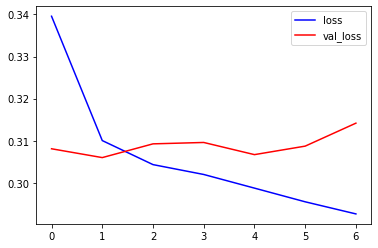

In [75]:
plt.plot(history.history['loss'], label='loss', color='blue')
plt.plot(history.history['val_loss'], label='val_loss', color='red')
plt.legend()
plt.show()

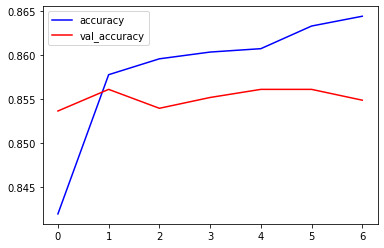

In [76]:
plt.plot(history.history['accuracy'], label='accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='red')
plt.legend()
plt.show()

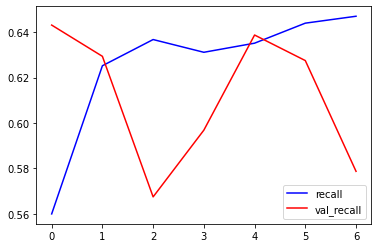

In [77]:
plt.plot(history.history['recall'], label='recall', color='blue')
plt.plot(history.history['val_recall'], label='val_recall', color='red')
plt.legend()
plt.show()

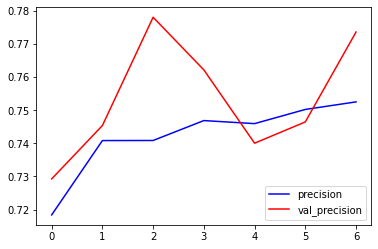

In [79]:
plt.plot(history.history['precision'], label='precision', color='blue')
plt.plot(history.history['val_precision'], label='val_precision', color='red')
plt.legend()
plt.show()